## Import des bibliothèques 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer



### Chargement des dataframe pour le projet

In [4]:
x_train = pd.read_csv(r"./data/x_train.csv")
y_train = pd.read_csv(r"./data/y_train.csv")
x_test = pd.read_csv(r"./data/x_test.csv")

### Début de l'analyse des dataframes

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(8028, 2)
(8028, 2)
(2035, 2)


In [6]:
x_train.head()

,ID,question
0,0,"bonjour, je m suis trompé de forum pour ma qu..."
1,1,est ce que le motilium me soulagera contre les...
2,2,mon médecin m'a prescrit adenyl. au 2ème cache...
3,3,Est-ce qu'il existe une forme adaptée aux enfa...
4,4,mon medecin me soigne pour une rhino pha...


In [7]:
y_train.head()

,ID,intention
0,0,28
1,1,31
2,2,28
3,3,44
4,4,31


In [8]:
x_test.head()

,ID,question
0,8028,autisme-homéopathie-antidote vaccins ??
1,8029,Quel topique appliquer pour dermatite atopique...
2,8030,traitement kystes avec diane 35?
3,8031,je souffre d'insuffisance veineuse (acrocyanos...
4,8032,"je suis enceinte depuis 1 mois, est ce que les..."


#### Ragard des types pour chaque variable

In [9]:
x_train.dtypes

ID           int64
question    object
dtype: object

In [58]:
y_train.dtypes

ID           int64
intention    int64
dtype: object

In [59]:
x_test.dtypes

ID           int64
question    object
dtype: object

#### vérification de la présence de doublons

In [10]:
print("Nombre de valeur unique pour chaque variable de la data frame x_train : ")
print(x_train.nunique())

print("Nombre de valeur unique pour chaque variable de la data frame y_train : ")
print(y_train.nunique())


Nombre de valeur unique pour chaque variable de la data frame x_train : 
ID          8028
question    7655
dtype: int64
Nombre de valeur unique pour chaque variable de la data frame y_train : 
ID           8028
intention      51
dtype: int64


#### Nombre de valeur manquantes

In [8]:
print("Nombre de valeur manquantes pour chaque variable de la data frame x_train : ")
print(x_train.isna().sum())

print("Nombre de valeur manquantes pour chaque variable de la data frame y_train : ")
print(y_train.isna().sum())

print("Nombre de valeur manquantes pour chaque variable de la data frame x_test : ")
print(x_test.isna().sum())


Nombre de valeur manquantes pour chaque variable de la data frame x_train : 
ID          0
question    0
dtype: int64
Nombre de valeur manquantes pour chaque variable de la data frame y_train : 
ID           0
intention    0
dtype: int64
Nombre de valeur manquantes pour chaque variable de la data frame x_test : 
ID          0
question    0
dtype: int64


#### Ocuurence de chaque question et de chaque intention

In [11]:
#print("Nombre de valeur manquantes pour chaque variable de la data frame x_train : ")
#print(x_train[].value_counts())

print("Nombre de valeur manquantes pour chaque variable de la data frame y_train : ")
print(y_train["intention"].value_counts())


Nombre de valeur manquantes pour chaque variable de la data frame y_train : 
intention
28    1796
31     565
44     560
22     461
48     387
34     382
32     321
14     317
42     315
23     208
0      204
11     195
21     180
33     144
8      134
37     126
38     120
13     119
27     104
5      102
43      91
12      89
47      82
29      77
4       76
26      72
10      68
24      64
9       54
30      52
45      50
35      50
41      45
46      45
39      40
50      33
25      30
6       26
36      25
1       23
18      23
15      23
49      22
2       22
7       20
19      20
20      19
16      17
17      15
3        8
40       7
Name: count, dtype: int64


In [10]:
print("Nombre de valeur manquantes pour chaque variable de la data frame y_train : ")
print(y_train["intention"].value_counts(normalize=True) * 100)

Nombre de valeur manquantes pour chaque variable de la data frame y_train : 
intention
28    22.371699
31     7.037867
44     6.975585
22     5.742402
48     4.820628
34     4.758346
32     3.998505
14     3.948680
42     3.923767
23     2.590932
0      2.541106
11     2.428999
21     2.242152
33     1.793722
8      1.669158
37     1.569507
38     1.494768
13     1.482312
27     1.295466
5      1.270553
43     1.133533
12     1.108620
47     1.021425
29     0.959143
4      0.946687
26     0.896861
10     0.847035
24     0.797210
9      0.672646
30     0.647733
45     0.622820
35     0.622820
41     0.560538
46     0.560538
39     0.498256
50     0.411061
25     0.373692
6      0.323866
36     0.311410
1      0.286497
18     0.286497
15     0.286497
49     0.274041
2      0.274041
7      0.249128
19     0.249128
20     0.236672
16     0.211759
17     0.186846
3      0.099651
40     0.087195
Name: proportion, dtype: float64


#### Affichage d'un histogrammme pour voir le noombre d'occurence de chaque intention
##### on peut s'apercevoir que l'intention 28 revient très souvent et pourrait biaisé le modèle

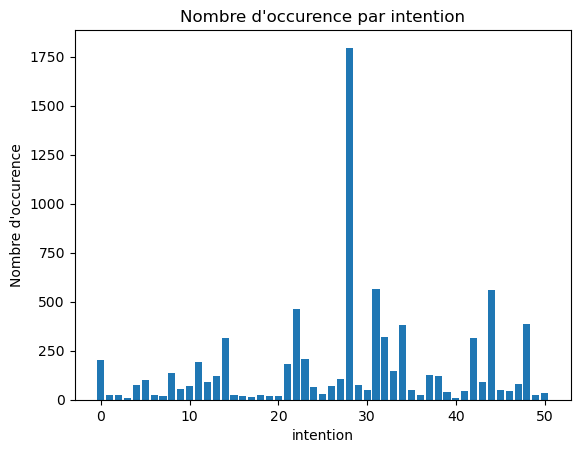

In [12]:
plt.bar(y_train["intention"].value_counts().index, y_train["intention"].value_counts())
plt.xlabel("intention")
plt.ylabel("Nombre d'occurence")
plt.title("Nombre d'occurence par intention")
plt.show()

##### Merging des dataframe x_train et y_train car nous en avons besoin pour l'entrainement du modèle de classification NLP

In [13]:
import string
def remove_punct(text):
    r = ""
    for i in text:
        if i not in string.punctuation:
            r+=i
        else:
            r+=" "
    return r

def add_text_list(text):
    return text.split()

def remove_one_character(liste):
    liste1 = []
    for i in liste:
        if len(i) > 1:
            liste1.append(i)
    return " ".join(liste1)

In [14]:
data = pd.merge(x_train, y_train, on = "ID", how = "inner")

In [15]:
data["question_modifier"] = data["question"].apply(remove_punct)
data["question_modifier_1"] = data["question_modifier"].apply(add_text_list)
data["question_modifier_2"] = data["question_modifier_1"].apply(remove_one_character)

In [16]:
ligne_intentions_28 = data.loc[data['intention'] == 28]

In [17]:
ligne_intentions_28

,ID,question,intention,question_modifier,question_modifier_1,question_modifier_2
0,0,"bonjour, je m suis trompé de forum pour ma qu...",28,bonjour je m suis trompé de forum pour ma qu...,"[bonjour, je, m, suis, trompé, de, forum, pour...",bonjour je suis trompé de forum pour ma questi...
2,2,mon médecin m'a prescrit adenyl. au 2ème cache...,28,mon médecin m a prescrit adenyl au 2ème cache...,"[mon, médecin, m, a, prescrit, adenyl, au, 2èm...",mon médecin prescrit adenyl au 2ème cachet des...
7,7,je suis sous mercilon. J'ai des nausées et des...,28,je suis sous mercilon J ai des nausées et des...,"[je, suis, sous, mercilon, J, ai, des, nausées...",je suis sous mercilon ai des nausées et des sa...
12,12,je suis sous antiobiotique depuis bientot une ...,28,je suis sous antiobiotique depuis bientot une ...,"[je, suis, sous, antiobiotique, depuis, biento...",je suis sous antiobiotique depuis bientot une ...
14,14,épilepsie et havlane ?,28,épilepsie et havlane,"[épilepsie, et, havlane]",épilepsie et havlane
...,...,...,...,...,...,...
8003,8003,"bonjour, je voudrais savoir si le stablon et ...",28,bonjour je voudrais savoir si le stablon et ...,"[bonjour, je, voudrais, savoir, si, le, stablo...",bonjour je voudrais savoir si le stablon et le...
8004,8004,je dois utiliser kétoderm 2% gel 2 fois par se...,28,je dois utiliser kétoderm 2 gel 2 fois par se...,"[je, dois, utiliser, kétoderm, 2, gel, 2, fois...",je dois utiliser kétoderm gel fois par semaine...
8020,8020,asthme du au sirop stodal?,28,asthme du au sirop stodal,"[asthme, du, au, sirop, stodal]",asthme du au sirop stodal
8021,8021,est ce que le temesta pousse au suicide ?,28,est ce que le temesta pousse au suicide,"[est, ce, que, le, temesta, pousse, au, suicide]",est ce que le temesta pousse au suicide


In [33]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Assuming you have your DataFrame named 'data' and the column containing text is 'question_modifier_2'

# Download NLTK stopwords if not already downloaded
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Load French stopwords
stop_words = set(stopwords.words('french'))

# Function to remove stopwords from text
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

# Apply the remove_stopwords function to the 'question_modifier_2' column
data['question_modifier_2'] = data['question_modifier_2'].apply(remove_stopwords)

# Now your DataFrame 'data' will have French stop words removed from the 'question_modifier_2' column


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/neilmarteau/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/neilmarteau/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


##### Partie modélisation

In [38]:
counter = Counter(data['intention'].tolist())
top_10_varieties = {i[0]: idx for idx, i in enumerate(counter.most_common(10))}
data = data[data['intention'].map(lambda x: x in top_10_varieties)]

description_list = data['question_modifier_2'].tolist()
varietal_list = [top_10_varieties[i] for i in data['intention'].tolist()]
varietal_list = np.array(varietal_list)

count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(description_list)


tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

train_x, test_x, train_y, test_y = train_test_split(x_train_tfidf, varietal_list, test_size=0.3)

In [39]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Assuming you have already loaded your data into train_x, train_y, test_x, test_y

# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(train_x, train_y)
rf_y_score = rf_clf.predict(test_x)
rf_accuracy = accuracy_score(test_y, rf_y_score)
print("Random Forest Classifier Accuracy: %.2f%%" % (rf_accuracy * 100))

# XGBoost Classifier
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(train_x, train_y)
xgb_y_score = xgb_clf.predict(test_x)
xgb_accuracy = accuracy_score(test_y, xgb_y_score)
print("XGBoost Classifier Accuracy: %.2f%%" % (xgb_accuracy * 100))


Random Forest Classifier Accuracy: 70.70%
XGBoost Classifier Accuracy: 69.57%


In [40]:
from sklearn.svm import SVC


clf = SVC(kernel='linear').fit(train_x, train_y)
y_score = clf.predict(test_x)

n_right = 0
for i in range(len(y_score)):
    if y_score[i] == test_y[i]:
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(test_y)) * 100)))

Accuracy: 73.15%


In [42]:
x_test["question_modifier"] = x_test["question"].apply(remove_punct)
x_test["question_modifier_1"] = x_test["question_modifier"].apply(add_text_list)
x_test["question_modifier_2"] = x_test["question_modifier_1"].apply(remove_one_character)
x_test["question_modifier_2"] = x_test["question_modifier_2"].apply(remove_stopwords)

x_test_counts = count_vect.transform(x_test['question_modifier_2'].tolist())
x_test_tfidf = tfidf_transformer.transform(x_test_counts)

# Predict labels for x_test
#y_test_score = clf.predict(x_test_tfidf)
y_test_score = rf_clf.predict(x_test_tfidf)

# Now you have the predicted labels for x_test, you can do whatever you want with them
# For example, you can add the predicted labels to x_test DataFrame
x_test['predicted_intention'] = [list(top_10_varieties.keys())[i] for i in y_test_score]



In [43]:
output_test = x_test[["ID", "predicted_intention"]]

In [44]:
output_test

,ID,predicted_intention
0,8028,22
1,8029,32
2,8030,32
3,8031,22
4,8032,44
...,...,...
2030,10058,44
2031,10059,28
2032,10060,28
2033,10061,14


In [29]:
output_test.to_csv("submission.csv", index=False)